## Group 13 - IDC 409 Term Project

Members:
* Tushar Baruah (MS19015)
* Atharva Hingane (MS19043)
* Nitish (MS19101)

File for visualization of data and how different parameters give signal or background

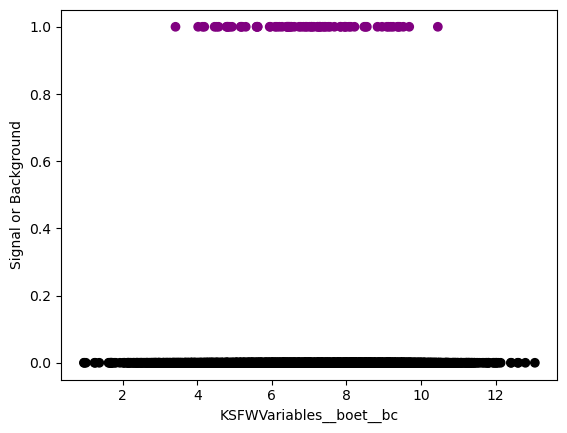

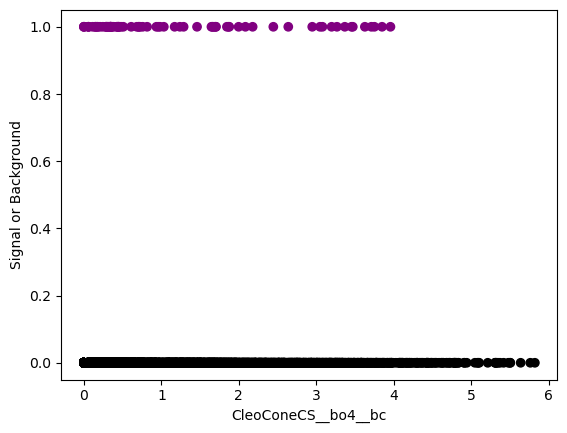

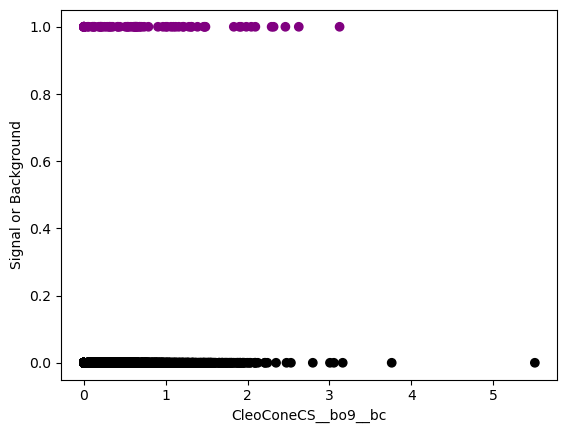

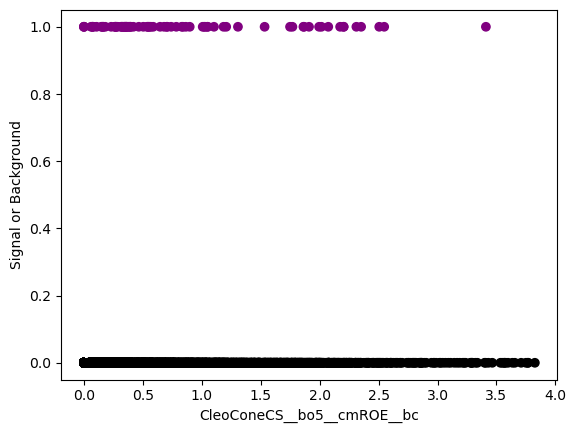

In [61]:
# Importing data and performing PCA

# data URL = https://drive.google.com/file/d/1wceoRWDkqdXrAAt6x6Kuf9Dv3alW3iad/view?usp=drive_link
# GITHUB link = https://github.com/TusharBaruah/Binary-Classification

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

Data = pd.read_csv('data_hep.csv')
Y_labels = Data['type'].to_numpy()

# re-labelling the data to signal (1) and background (0)
for i in range(0,len(Y_labels)):
    if(Y_labels[i]==0 or Y_labels[i]==1):
        Y_labels[i]=1.0 # signal
    else:
        Y_labels[i]=0.0 # background

Data = Data.drop('type',axis=1) # removing previous 'type' label
Data['type']=Y_labels # adding the signal and background label
X_set = Data.drop(columns=["Unnamed: 0","type"])

Y_colour = []
for i in range(len(Y_labels)):
    if(Y_labels[i]==1):
        Y_colour.append('purple')
    else:
        Y_colour.append('black')

# put a suitable location to save plots
location = 'E:/Studies/9th_semester_2023/IDC409_intro_DS/project/plots/' 
col_names = list(X_set.columns)
for i in range(1,5):
    # a=random.randint(2, 59) # pick random parameters to plot
    a = 5*i
    b=col_names[a]
    dt=Data[b]
    plt.scatter(dt[55000:60000],Y_labels[55000:60000],c=Y_colour[55000:60000])
    plt.xlabel(b)
    plt.ylabel('Signal or Background')
    plt.savefig(location+'label_vs_'+b+'.pdf',bbox_inches='tight')
    plt.show()

In [62]:
# Performing Logistic Regression

import time
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import math 

start = time.time()

def sigmoid(x):
    x = np.float64(x)
    y = 1 / (1 + np.exp(-x))
    return y

def our_log(input):
    if(input < 0.00000000001):
        return - 2**30
    else:
        return np.log(input)

# Function to compute cost  - using vectorization
def cost_logreg_vec(X, y, w, b):
    m, n = X.shape
    if(len(y)!=m or len(w) !=n):
        print("Dataset array and Labels/weights array size does not match")
    z = np.matmul(X, w) + (b * np.ones(m))
    y_dash = sigmoid(z)
    loss_vec = np.array([- (y[i] * our_log(y_dash[i])) - ((1 - y[i]) * our_log(1 - y_dash[i])) for i in range(m)])
    #loss_vec = np.array([- (y[i] * np.log(y_dash[i])) - ((1 - y[i]) * np.log(1 - y_dash[i])) for i in range(m)])
    cost = np.dot(loss_vec, np.ones(m)) / m
    # cost = cost_func_vec(y, y_dash)
    return cost

def grad_logreg_vec(X, y, w, b): 
    m, n = X.shape
    if(len(y)!=m or len(w) !=n):
        print("Dataset array and Labels/weights array size does not match")
    y_dash = sigmoid(np.matmul(X, w) + b * np.ones(m))
    grad_w = np.matmul(y_dash - y, X) / m
    grad_b = np.dot(y_dash - y, np.ones(m)) / m
    
    return grad_w, grad_b

# Gradient descent algorithm for logistic regression
def grad_desc(X, y, w, b, learning_rate, n_iter, show_cost = True): 
    m, n = X.shape
    if(len(y)!=m or len(w) !=n):
        print("Dataset array and Labels/weights array size does not match")
    cost_history, params_history = [], []

    for i in range(n_iter):
        grad_w, grad_b = grad_logreg_vec(X, y, w, b)   
        w += - learning_rate * grad_w
        b += - learning_rate * grad_b
        cost =  cost_logreg_vec(X, y, w, b)
        cost_history.append(cost)
        params_history.append([w, b])
        if show_cost == True and (i == n_iter - 1):
            print("Iteration",i,",Cost:",float(cost_history[i]))
        
    return w, b, cost_history, params_history

X_set = X_set.to_numpy()

pca= PCA(n_components=29)
result=pca.fit(X_set)
X_pca= result.transform(X_set)
print("Before PCA:",X_set.shape,"\nAfter PCA:",X_pca.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y_labels, test_size = 0.3, random_state=0)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",Y_train.shape)
print("Y_test:",Y_test.shape)

# Learning model parameters using gradient descent algorithm
a=np.zeros(X_train.shape[1])

w_out, b_out, cost_history, params_history = grad_desc(X_train,
                                                       Y_train,
                                                       a,
                                                       0,
                                                       learning_rate = 0.1,
                                                       n_iter = 250)

# Prediction and evaluation on the training set and the test set
y_train_prob = sigmoid(np.matmul(X_train, w_out) + (b_out * np.ones(X_train.shape[0])))
y_test_prob = sigmoid(np.matmul(X_test, w_out) + (b_out * np.ones(X_test.shape[0])))
y_train_pred, y_test_pred = (y_train_prob > 0.5).astype(int), (y_test_prob > 0.5).astype(int)

end = time.time()
print("Time taken by the algorithm=",end-start,"seconds")

# print("Training:\n",classification_report(Y_train, y_train_pred))
# print("Testing:\n",classification_report(Y_test, y_test_pred))

cm = confusion_matrix(Y_test, y_test_pred)
print('Confusion matrix\n', cm)
# print('True Positives(TP) = ', cm[0,0])
# print('True Negatives(TN) = ', cm[1,1])
# print('False Positives(FP) = ', cm[0,1])
# print('False Negatives(FN) = ', cm[1,0])

Before PCA: (70606, 59) 
After PCA: (70606, 29)
X_train: (49424, 29)
X_test: (21182, 29)
Y_train: (49424,)
Y_test: (21182,)
Iteration 249 ,Cost: 0.39959668801068193
Time taken by the algorithm= 38.44917345046997 seconds
Confusion matrix
 [[8649 1945]
 [1789 8799]]


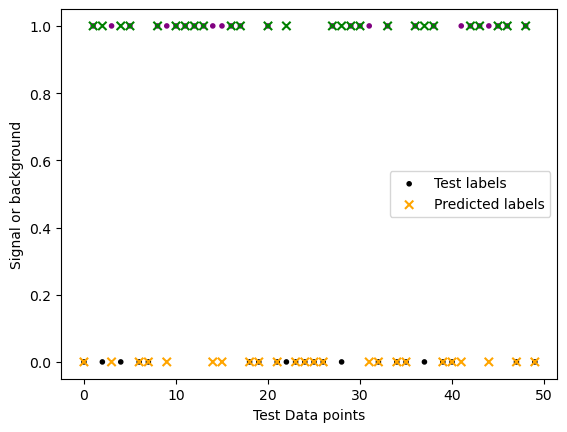

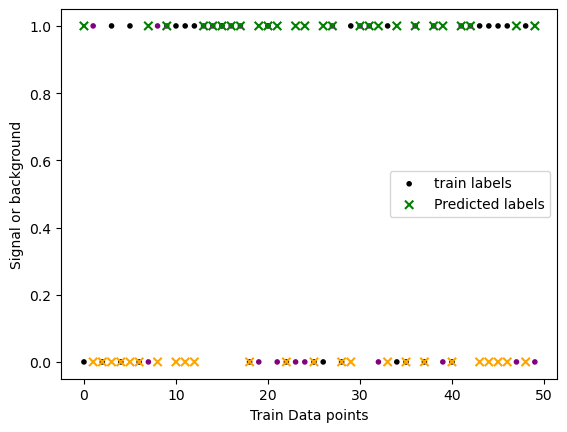

In [85]:
# visualizing after prediction
import matplotlib.pyplot as plt

# put a suitable location to save plots
location = 'E:/Studies/9th_semester_2023/IDC409_intro_DS/project/plots/'

Y_colour1 = []
Y_colour2 = []
for i in range(len(Y_test)):
    if(Y_test[i]==1):
        Y_colour1.append('purple')
    else:
        Y_colour1.append('black')
    if(y_test_pred[i]==1):
        Y_colour2.append('green')
    else:
        Y_colour2.append('orange')

plt.scatter(np.arange(0,len(Y_test[0:50])),Y_test[0:50],label='Test labels',c=Y_colour1[0:50],marker='.')
plt.scatter(np.arange(0,len(y_test_pred[0:50])),y_test_pred[0:50],label='Predicted labels',c=Y_colour2[0:50],marker='x')
plt.xlabel('Test Data points')
plt.ylabel('Signal or background')
plt.legend()
plt.savefig(location+'test_pred_vs_true.pdf',bbox_inches='tight')
plt.show()


Y_colour3 = []
Y_colour4 = []
for i in range(len(Y_train)):
    if(Y_train[i]==1):
        Y_colour3.append('purple')
    else:
        Y_colour3.append('black')
    if(y_train_pred[i]==1):
        Y_colour4.append('green')
    else:
        Y_colour4.append('orange')

plt.scatter(np.arange(0,len(Y_train[0:50])),Y_test[0:50],label='train labels',c=Y_colour3[0:50],marker='.')
plt.scatter(np.arange(0,len(y_train_pred[0:50])),y_train_pred[0:50],label='Predicted labels',c=Y_colour4[0:50],marker='x')
plt.xlabel('Train Data points')
plt.ylabel('Signal or background')
plt.legend()
plt.savefig(location+'train_pred_vs_true.pdf',bbox_inches='tight')
plt.show()

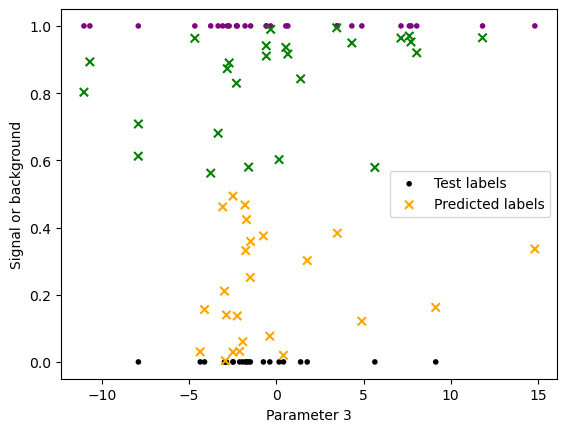

In [94]:
# visualizing after prediction

import matplotlib.pyplot as plt

# put a suitable location to save plots
location = 'E:/Studies/9th_semester_2023/IDC409_intro_DS/project/plots/'

param = 2
Y_colour1 = []
Y_colour2 = []
for i in range(len(Y_test)):
    if(Y_test[i]==1):
        Y_colour1.append('purple')
    else:
        Y_colour1.append('black')
    if(y_test_pred[i]==1):
        Y_colour2.append('green')
    else:
        Y_colour2.append('orange')

plt.scatter(X_test[0:50,param-1],Y_test[0:50],label='Test labels',c=Y_colour1[0:50],marker='.')
plt.scatter(X_test[0:50,param-1],y_test_prob[0:50],label='Predicted labels',c=Y_colour2[0:50],marker='x')
plt.xlabel('Parameter '+str(param))
plt.ylabel('Signal or background')
plt.legend()
# plt.savefig(location+'test_pred_vs_true.pdf',bbox_inches='tight')
plt.show()